# Demo: GeoPandas
UW Geospatial Data Analysis  
CEE498/CEWA599  
David Shean

## Background
* https://geopandas.org/data_structures.html

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Load csv as Pandas DataFrame

In [2]:
glas_fn = '../01_Shell_Github/data/GLAH14_tllz_conus_lulcfilt_demfilt.csv'

In [3]:
glas_df = pd.read_csv(glas_fn)

In [4]:
type(glas_df)

pandas.core.frame.DataFrame

In [5]:
glas_df.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31


## Convert to GeoDataFrame

In [6]:
gpd.GeoDataFrame?

Init signature: gpd.GeoDataFrame(data=None, *args, geometry=None, crs=None, **kwargs)
Docstring:     
A GeoDataFrame object is a pandas.DataFrame that has a column
with geometry. In addition to the standard DataFrame constructor arguments,
GeoDataFrame also accepts the following keyword arguments:

Parameters
----------
crs : value (optional)
    Coordinate Reference System of the geometry objects. Can be anything accepted by
    :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
    such as an authority string (eg "EPSG:4326") or a WKT string.
geometry : str or array (optional)
    If str, column to use as geometry. If array, will be set as 'geometry'
    column on GeoDataFrame.

Examples
--------
Constructing GeoDataFrame from a dictionary.

>>> from shapely.geometry import Point
>>> d = {'col1': ['name1', 'name2'], 'geometry': [Point(1, 2), Point(2, 1)]}
>>> gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
>>> gdf
    col1                 geometry
0  name1  POINT

In [7]:
gpd.GeoDataFrame(glas_df)

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31
...,...,...,...,...,...,...,...,...
65231,2009.775995,733691.238340,37.896222,-117.044399,1556.16,1556.43,0.00,31
65232,2009.775995,733691.238340,37.897769,-117.044675,1556.02,1556.43,0.00,31
65233,2009.775995,733691.238340,37.899319,-117.044952,1556.19,1556.44,0.00,31
65234,2009.775995,733691.238340,37.900869,-117.045230,1556.18,1556.44,0.00,31


### Looks the same, let's add geometry column!

In [8]:
gpd.points_from_xy?

Signature: gpd.points_from_xy(x, y, z=None, crs=None)
Docstring:
Generate GeometryArray of shapely Point geometries from x, y(, z) coordinates.

In case of geographic coordinates, it is assumed that longitude is captured by
``x`` coordinates and latitude by ``y``.

Parameters
----------
x, y, z : iterable
crs : value, optional
    Coordinate Reference System of the geometry objects. Can be anything accepted by
    :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
    such as an authority string (eg "EPSG:4326") or a WKT string.

Examples
--------
>>> import pandas as pd
>>> df = pd.DataFrame({'x': [0, 1, 2], 'y': [0, 1, 2], 'z': [0, 1, 2]})
>>> df
   x  y  z
0  0  0  0
1  1  1  1
2  2  2  2
>>> geometry = geopandas.points_from_xy(x=[1, 0], y=[0, 1])
>>> geometry = geopandas.points_from_xy(df['x'], df['y'], df['z'])
>>> gdf = geopandas.GeoDataFrame(
...     df, geometry=geopandas.points_from_xy(df['x'], df['y']))

Having geographic coordinates:

>>> df = pd.DataFram

In [9]:
mygeometry_array = gpd.points_from_xy(glas_df['lon'], glas_df['lat'])

In [10]:
mygeometry_array

<GeometryArray>
 ...
Length: 65236, dtype: geometry

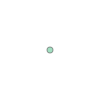

In [11]:
mygeometry_array[0]

In [12]:
type(mygeometry_array[0])

shapely.geometry.point.Point

In [13]:
print(mygeometry_array[0])

POINT (-105.356562 44.157897)


In [14]:
mygeometry_array[0].x

-105.356562

In [15]:
mygeometry_array[0].y

44.157897

In [16]:
glas_gdf = gpd.GeoDataFrame(glas_df, geometry=mygeometry_array)

In [17]:
glas_gdf.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-105.35656 44.15790)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-105.35812 44.15017)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-105.35843 44.14863)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-105.35874 44.14709)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-105.35905 44.14554)


In [18]:
glas_gdf.iloc[0]

decyear                        2003.139571
ordinal                      731266.943345
lat                              44.157897
lon                            -105.356562
glas_z                             1398.51
dem_z                              1400.52
dem_z_std                             0.33
lulc                                    31
geometry     POINT (-105.356562 44.157897)
Name: 0, dtype: object

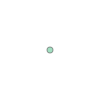

In [19]:
glas_gdf.iloc[0].geometry

In [20]:
type(glas_gdf['geometry'])

geopandas.geoseries.GeoSeries

In [21]:
type(glas_gdf['lon'])

pandas.core.series.Series

### Set CRS
Right now, we just have x and y values for each point, but no idea what those numbers mean

In [22]:
glas_gdf.crs

In [23]:
glas_gdf.crs = 'EPSG:4326'

In [24]:
glas_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## One-line DataFrame to GeoDataFrame constructor
The above demonstration was interactive, step-by-step, but can do this in one shot

In [25]:
#glas_gdf = gpd.GeoDataFrame(glas_df, crs='EPSG:4326', geometry=gpd.points_from_xy(glas_df['lon'], glas_df['lat']))

## Explore some GeoDataFrame attributes and methods

In [26]:
glas_gdf.total_bounds

array([-124.482406,   34.999455, -104.052336,   48.999727])

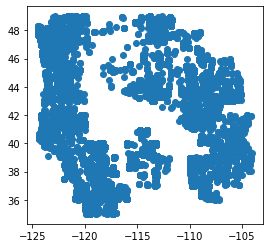

In [27]:
glas_gdf.plot();

In [28]:
glas_gdf_proj = glas_gdf.to_crs('EPSG:3857')

In [29]:
glas_gdf_proj.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-11728238.834 5489909.710)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-11728411.824 5488711.598)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-11728446.444 5488472.212)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-11728481.065 5488232.521)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-11728515.574 5487992.837)


In [30]:
glas_gdf_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

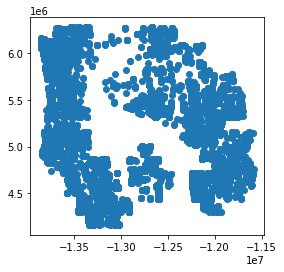

In [31]:
glas_gdf_proj.plot();

## Proj strings

In [32]:
glas_gdf.crs.to_epsg()

4326

In [33]:
glas_gdf.crs.to_proj4()

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


'+proj=longlat +datum=WGS84 +no_defs +type=crs'

In [34]:
glas_gdf_proj.crs.to_proj4()

'+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs'

In [35]:
proj_str = '+proj=merc'

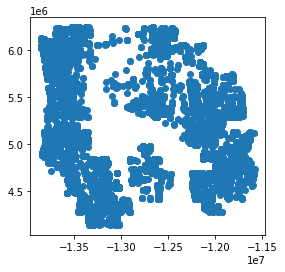

In [36]:
glas_gdf.to_crs(proj_str).plot();

## Combining datasets with different projections

In [37]:
#%matplotlib widget
%matplotlib inline

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [39]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


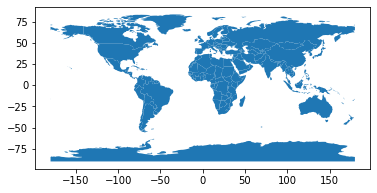

In [40]:
world.plot();

In [41]:
idx = world['name']=='United States of America'

In [42]:
idx

0      False
1      False
2      False
3      False
4       True
       ...  
172    False
173    False
174    False
175    False
176    False
Name: name, Length: 177, dtype: bool

In [43]:
us = world[idx]
us

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

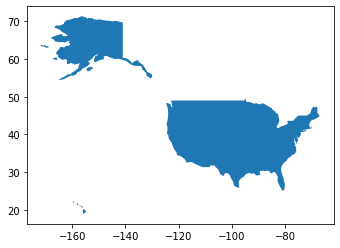

In [44]:
us.plot()

In [45]:
us.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
glas_gdf_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

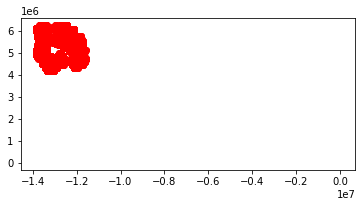

In [47]:
f, ax = plt.subplots()
us.plot(ax=ax)
glas_gdf_proj.plot(ax=ax, color='r');

#Where are the US polygons?  Let's take a look...

### Use a common projection!

In [48]:
us_proj = us.to_crs(glas_gdf_proj.crs)
us_proj

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."


In [49]:
us_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

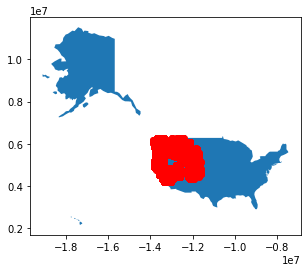

In [50]:
f, ax = plt.subplots()
us_proj.plot(ax=ax)
glas_gdf_proj.plot(ax=ax, color='r');

# Much better!